In [1]:
import mglearn
import matplotlib.pyplot as plt

This data set is to illustrate regression algorithm

In [2]:
# generates the data set
X, y = mglearn.datasets.make_wave()

Text(0, 0.5, 'Target')

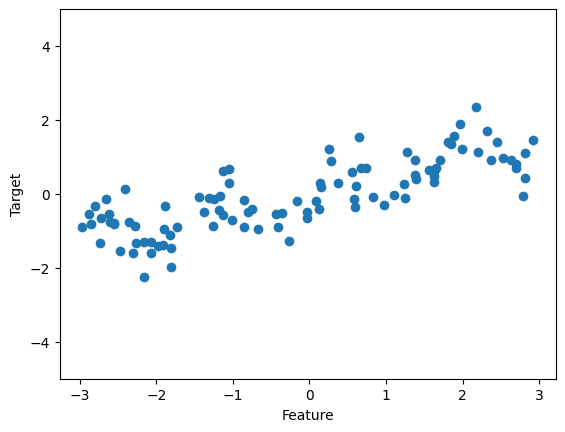

In [3]:
plt.plot(X, y, 'o')
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Target")

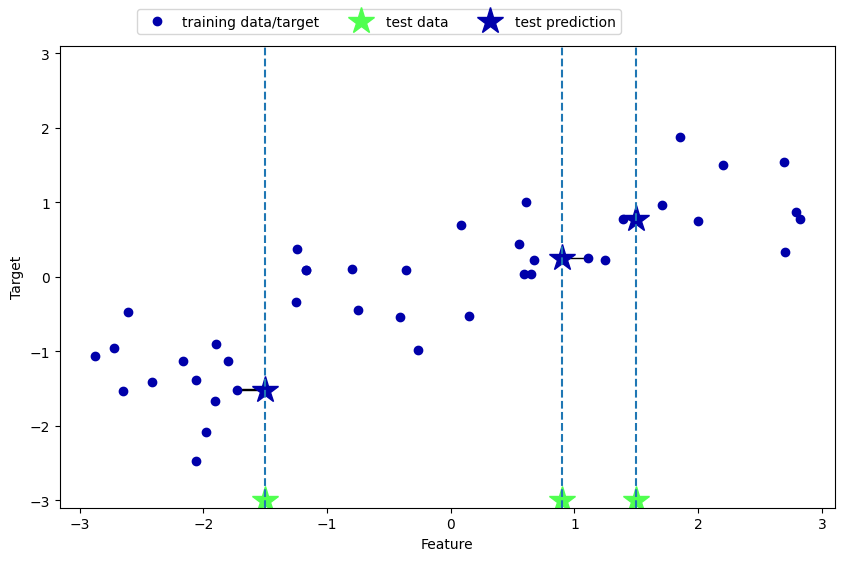

In [4]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

We can use more thatn the single closest neighbor for regression. We using multiple nearest negihbors, the prediction is the average, or mean of the relevant neighbors.

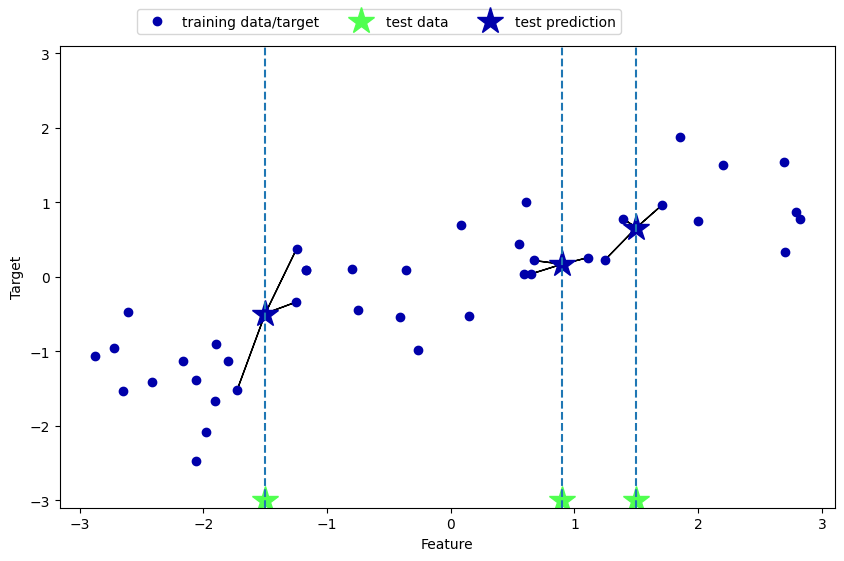

In [5]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

## evaluating the regressor

The `score` method in regressing, gives us the R^2 score. This is also known as __coefficient of determination__, which is a measure of goodness of a prediction for a regression model and yields a score between [0..1] 

In [8]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1
)

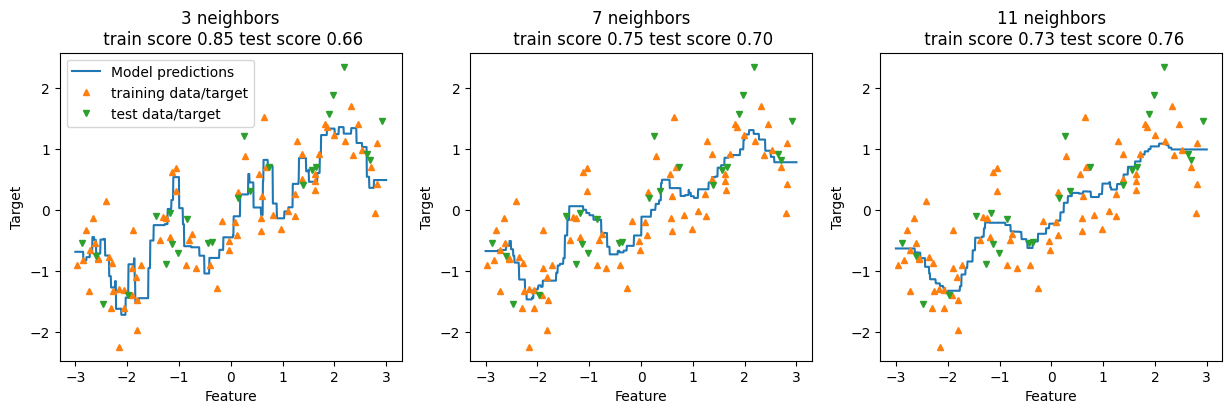

In [20]:
fig, axes = plt.subplots(1,3, figsize=(15,4))
# create 1000 data points, evenly spaced between -3 and 3
line = np.linspace(-3,3, 1000).reshape(-1, 1)
for n_neighbor, ax in zip([3, 7,11], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbor)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', markersize=4)
    ax.plot(X_test, y_test, 'v', markersize=4)

    ax.set_title(
        "{} neighbors\n train score {:.2f} test score {:.2f}".format(
            n_neighbor, reg.score(X_train, y_train), reg.score(X_test, y_test)
        )
    )
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")

axes[0].legend(["Model predictions", "training data/target", "test data/target"],
             loc="best")

We can observed that with lower neighbors, each point exert influents on our predictions, which gives unstable prediction. However, the more neighbors we consider, the more underfitting our prediction is